In [15]:
import numpy as np
import matplotlib.pyplot as plt

def PCA(X , num_components):
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    return X_reduced

In [3]:
import pandas as pd

import csv

Name_FWs = np.array([])
NAtoms_FWs = np.array([])
with open("data_features/data_NameFW_NAtoms.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        Name_FWs = np.append(Name_FWs, row[0])
        NAtoms_FWs = np.append(NAtoms_FWs, int(row[1]))

In [4]:
ListColumns = ["NameFW"]

for j in range(len(Name_FWs)):
    Var_aux = "Var_{j}".format(j = j)
    ListColumns.append(Var_aux)

import pandas as pd 

In [8]:
data = pd.read_csv("Dataframe_FWs_toPCADimensionAnalysis_kMeans.csv")


In [12]:
x = data.iloc[:,2:]


#Applying it to PCA function
mat_reduced = PCA(x , 2)

In [19]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

nameFW_df = data.iloc[:,1]

principal_df["NameFW"] = nameFW_df


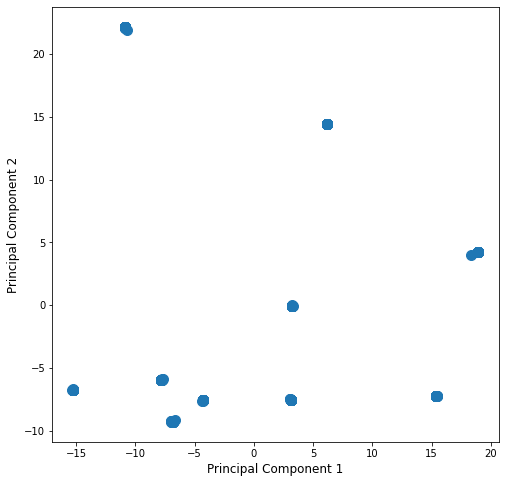

In [20]:
X = principal_df["PC1"]
Y = principal_df["PC2"]

fig = plt.figure(figsize = (8,8))
plt.scatter(X,Y, s = 100)
plt.xlabel("Principal Component 1", fontsize = 12)
plt.ylabel("Principal Component 2", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

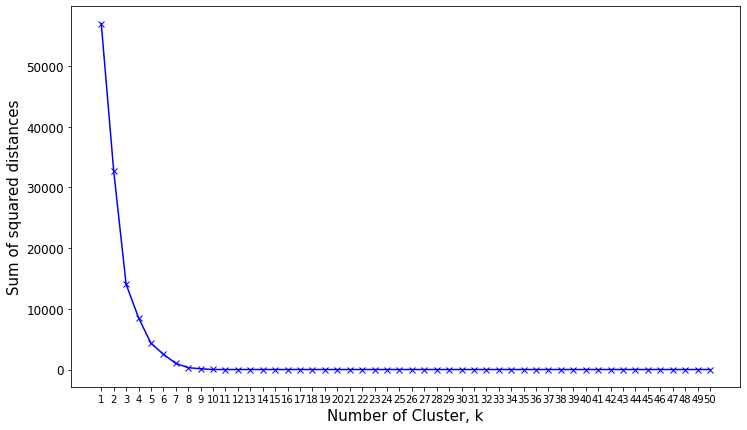

Ideal Number of Cluster =  12


In [21]:
from sklearn.cluster import KMeans

data_analysis = principal_df[["PC1", "PC2"]]

Sum_of_squared_distances = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_analysis)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize = (12,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster, k', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.xticks(K, K, fontsize = 10)
plt.yticks(fontsize = 12)
plt.show()

i = 1
tol = 100
while tol > 1e-2:
    tol = np.abs((Sum_of_squared_distances[i] - Sum_of_squared_distances[i-1])**2)
    i += 1
    if i == (len(Sum_of_squared_distances)-1):
        break

print("Ideal Number of Cluster = ", K[i-1])

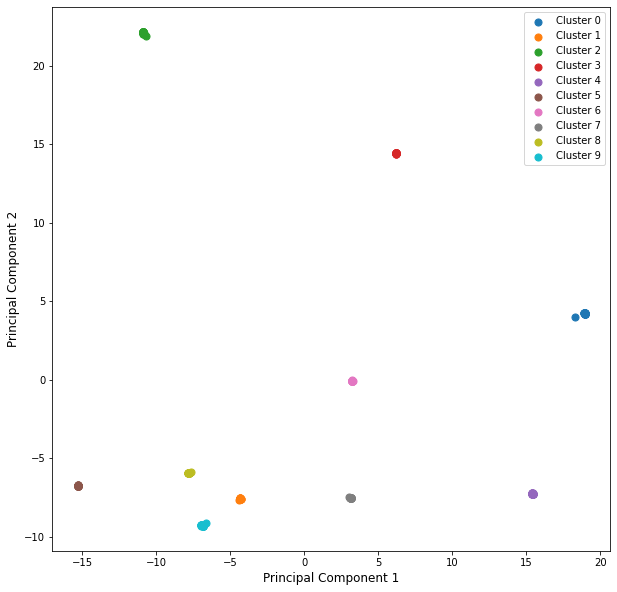

In [22]:
data_analysis = principal_df[["PC1", "PC2"]]

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters).fit(data_analysis)

principal_df["IdLabel_kClustering"] = kmeans.labels_

fig = plt.figure(figsize=(10, 10))

for i in range(n_clusters):
    plt.scatter(principal_df[principal_df["IdLabel_kClustering"] == i]["PC1"], 
                principal_df[principal_df["IdLabel_kClustering"] == i]["PC2"], 
                s = 50, label = "Cluster " +str(i))
plt.xlabel("Principal Component 1", fontsize = 12)
plt.ylabel("Principal Component 2", fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc = "best")
plt.show()

In [29]:
print(principal_df[principal_df["NameFW"] == "CHA"])

print(principal_df[principal_df["NameFW"] == "FAU"])

print(principal_df[principal_df["NameFW"] == "BEA"])

print(principal_df[principal_df["NameFW"] == "MFI"])

print(principal_df[principal_df["NameFW"] == "MOR"])

print(principal_df[principal_df["NameFW"] == "LTA"])

print(principal_df[principal_df["NameFW"] == "EUO"])

print(principal_df[principal_df["NameFW"] == "MRE"])

print(principal_df[principal_df["NameFW"] == "GIS"])

print(principal_df[principal_df["NameFW"] == "ANA"])

          PC1       PC2 NameFW  IdLabel_kClustering
47 -15.295989 -6.720372    CHA                    5
         PC1       PC2 NameFW  IdLabel_kClustering
76 -4.383798 -7.639686    FAU                    1
         PC1       PC2 NameFW  IdLabel_kClustering
32 -15.28568 -6.684051    BEA                    5
          PC1       PC2 NameFW  IdLabel_kClustering
136 -7.791037 -5.949234    MFI                    8
          PC1       PC2 NameFW  IdLabel_kClustering
139 -7.811944 -5.943859    MOR                    8
          PC1      PC2 NameFW  IdLabel_kClustering
125 -7.810235 -5.94036    LTA                    8
          PC1       PC2 NameFW  IdLabel_kClustering
70  15.387567 -7.225313    EUO                    4
          PC1       PC2 NameFW  IdLabel_kClustering
141 -7.810683 -5.943033    MRE                    8
         PC1       PC2 NameFW  IdLabel_kClustering
79 -4.322341 -7.555041    GIS                    1
         PC1        PC2 NameFW  IdLabel_kClustering
17  6.206707  14.435